In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform 

In [4]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [7]:
import cv2
import os

def load_images_from_folder(folder,label):
    images = []
    labels=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

imgs, lbls = load_images_from_folder("Genuine", "G")
imgs1, lbls1 = load_images_from_folder("Disguise", "G")
imgs2, lbls2 = load_images_from_folder("Reference", "G")
imgs3, lbls3 = load_images_from_folder("Simulated", "F")

genimgs = imgs + imgs1 + imgs2
genlbls = lbls + lbls1 + lbls2 
print genlbls

OSError: [Errno 2] No such file or directory: 'Genuine'

In [ ]:
allimgs = genimgs+imgs3
alllbls = genlbls+lbls3

In [ ]:
def rescale(imgs, width, height):
    # Rescale the images in the `images` array
    images28 = [transform.resize(image, (150, 150)) for image in imgs]

    # Import `rgb2gray` from `skimage.color`
    from skimage.color import rgb2gray

    # Convert `images28` to an array
    images28 = np.array(images28)

    # Convert `images28` to grayscale
    images28 = rgb2gray(images28)
    
    return images28

allimgs = rescale(allimgs, 150, 150)

In [6]:
# # Determine the (random) indexes of the images that you want to see 
# traffic_signs = [3,6,5,9]

# # Fill out the subplots with the random images that you defined 
# for i in range(len(imgs)):
#     plt.subplot(1, 4, i+1)
#     plt.axis('off')
#     plt.imshow(images[imgs[i]])
#     plt.subplots_adjust(wspace=0.5)
# print len(genlbls)
for ima in allimgs:
    plt.figure()
    plt.imshow(ima)
    print ima.shape
    
# plt.show()

NameError: name 'allimgs' is not defined

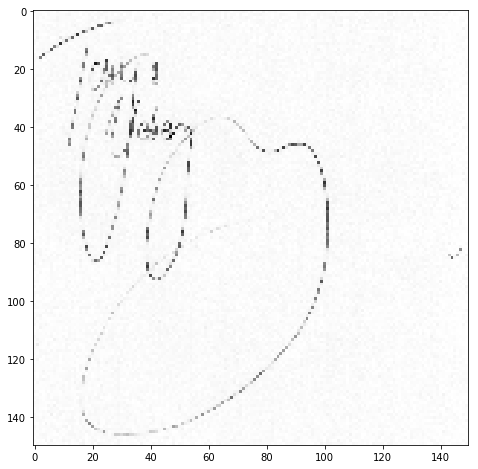

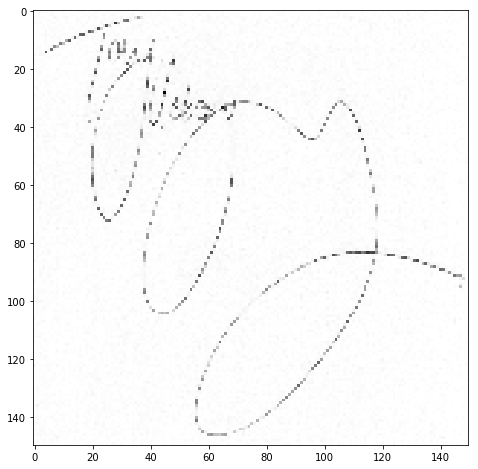

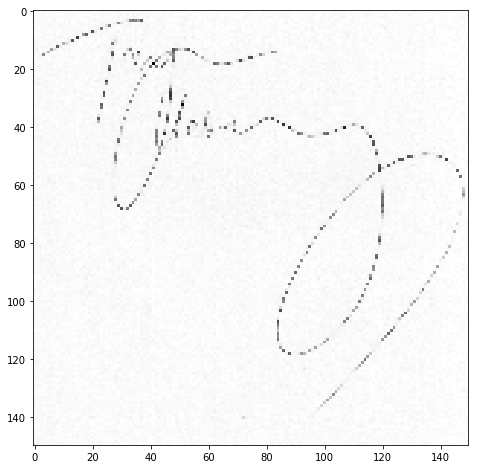

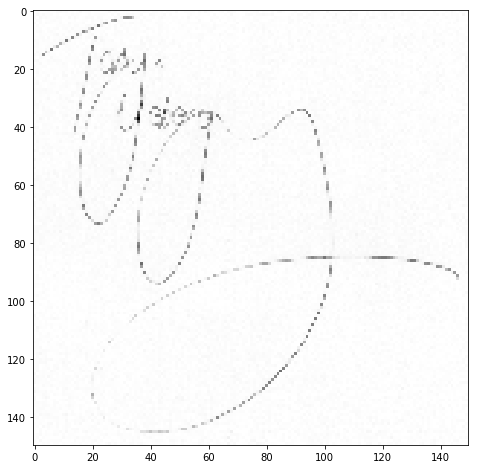

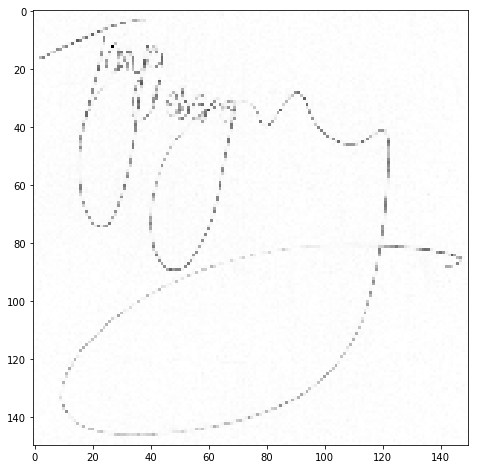

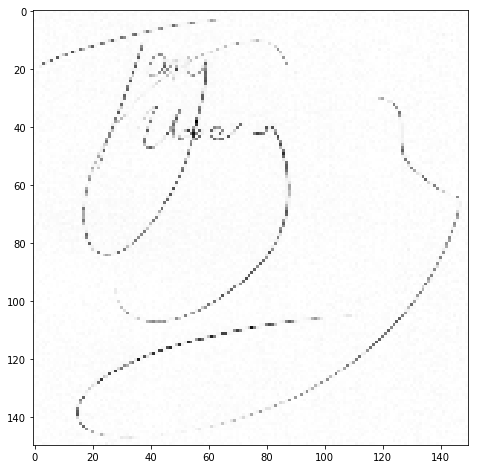

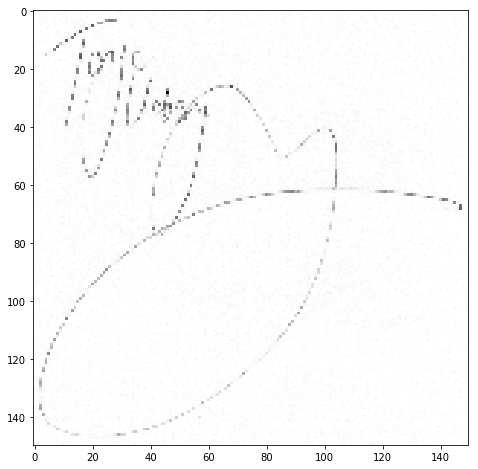

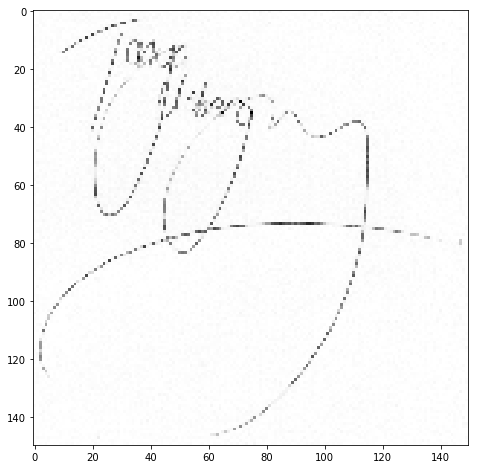

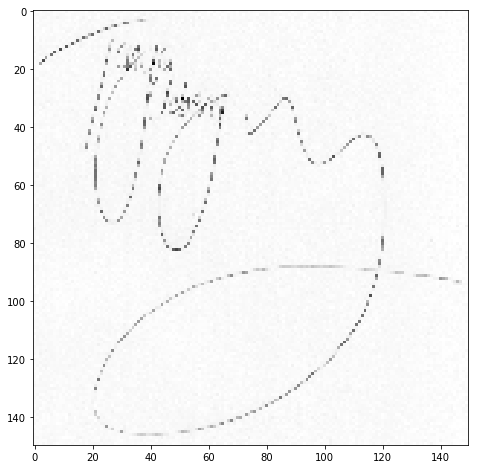

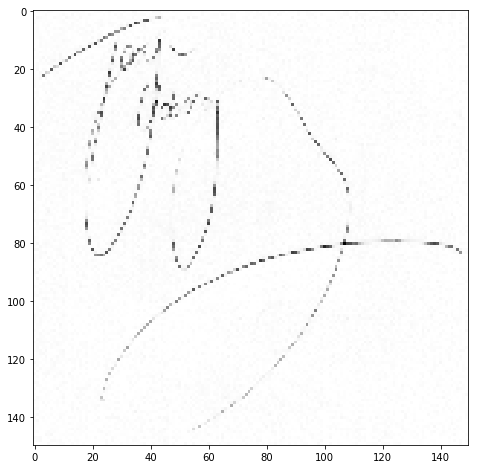

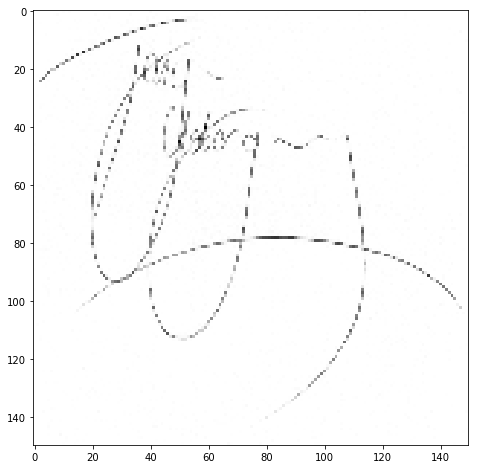

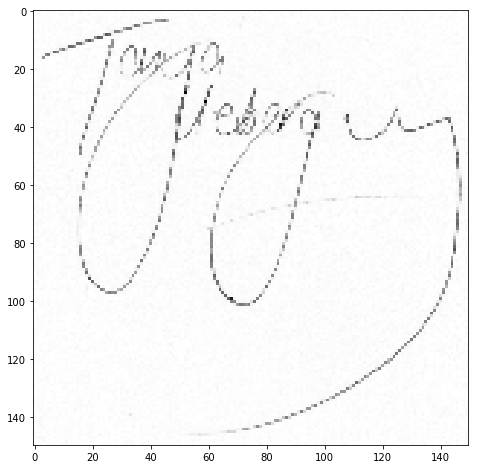

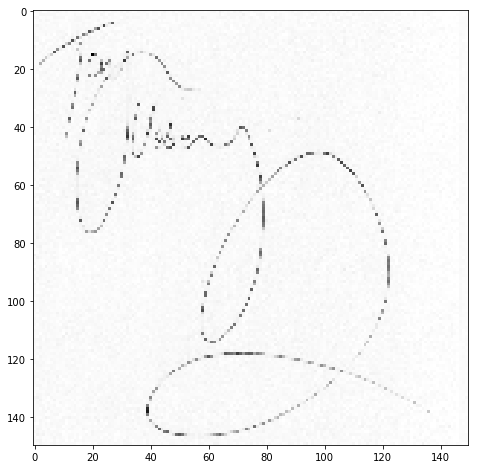

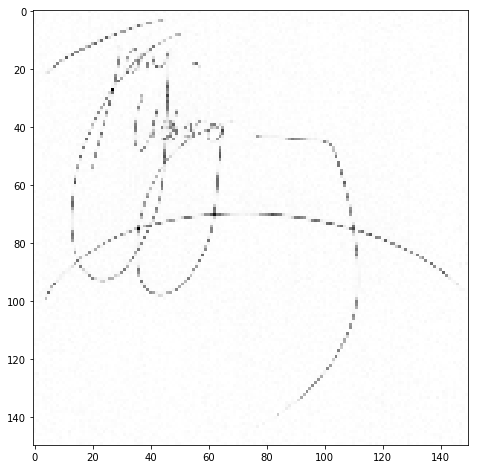

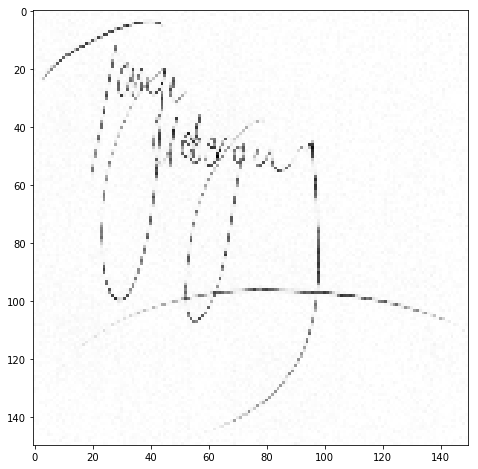

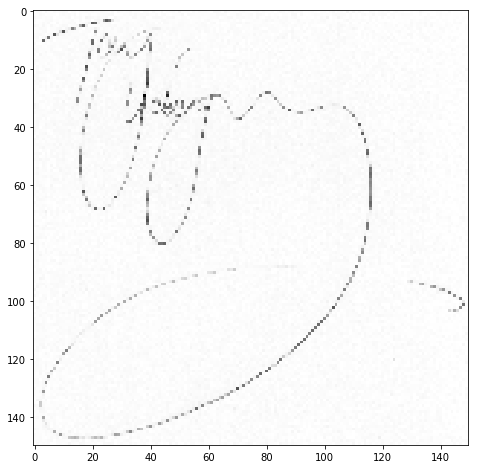

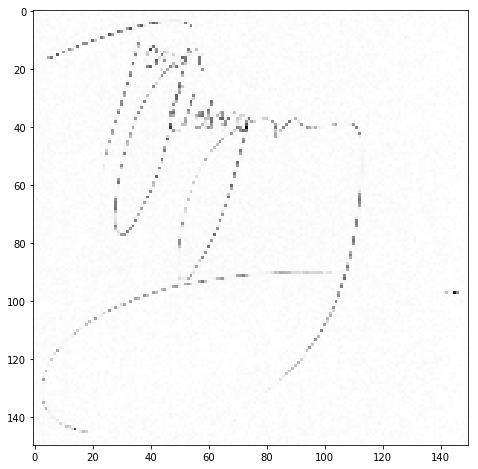

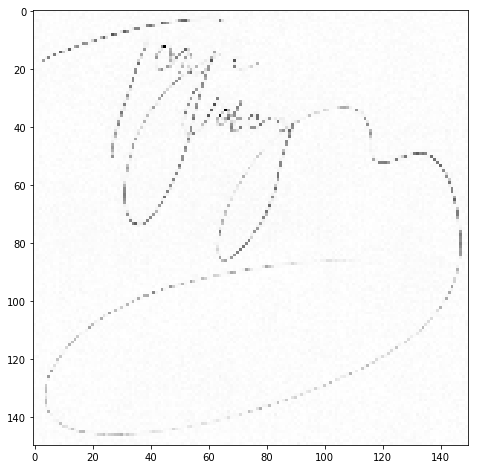

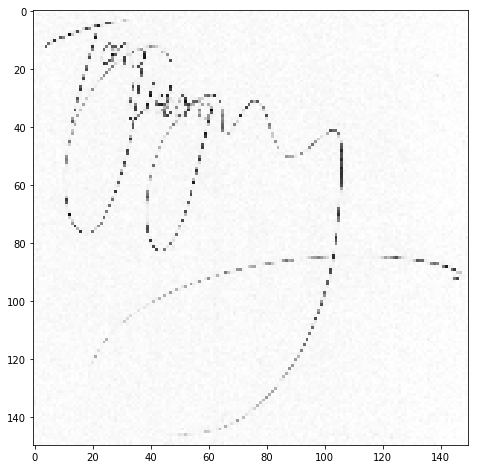

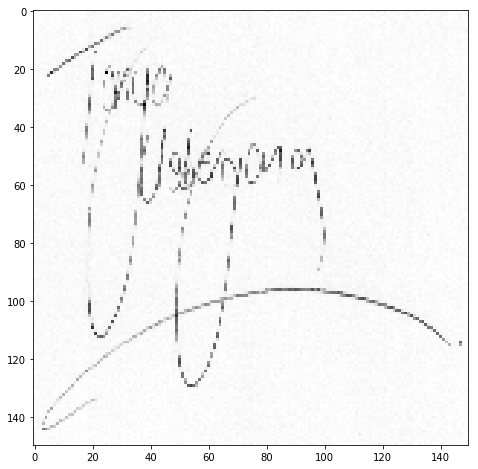

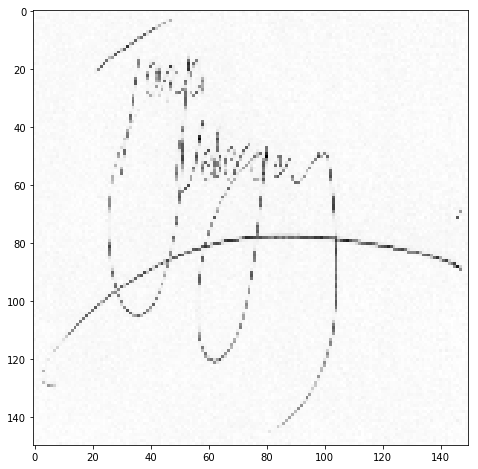

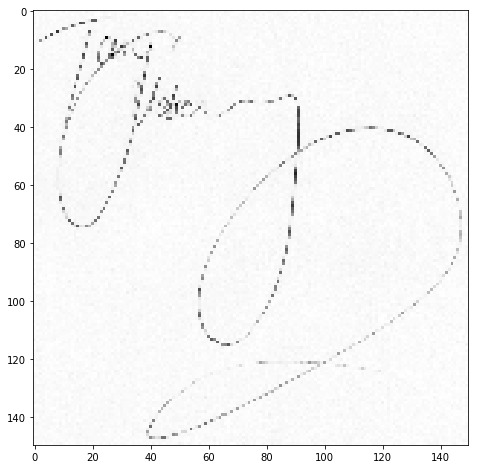

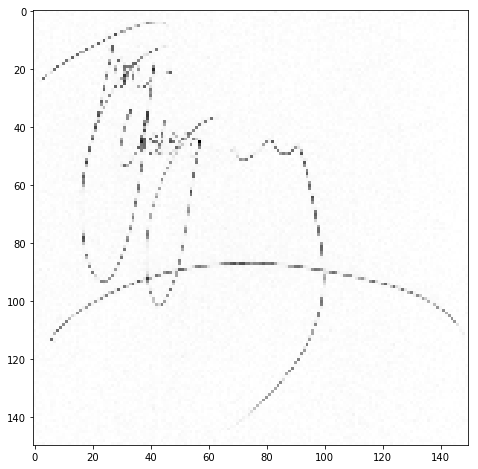

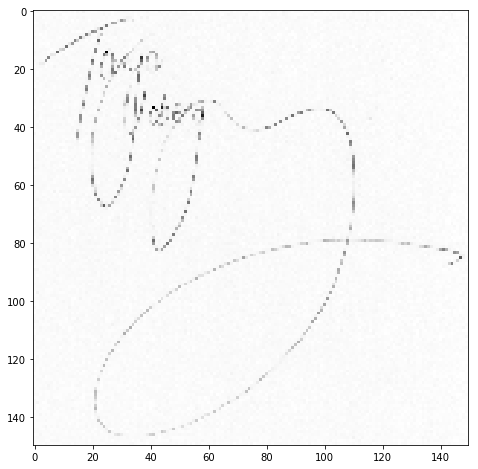

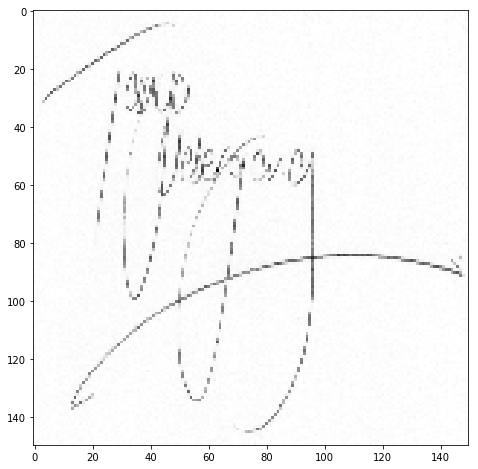

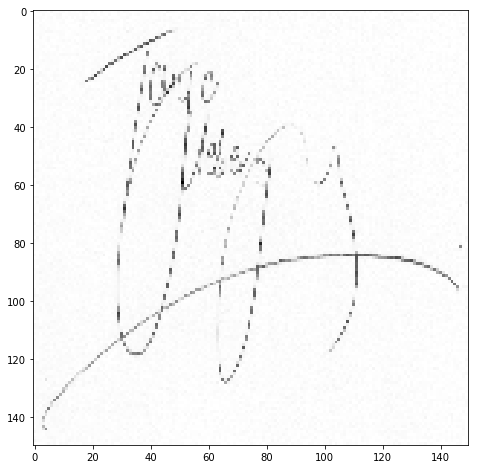

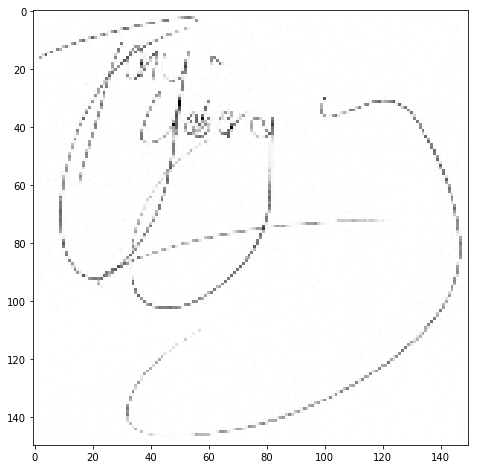

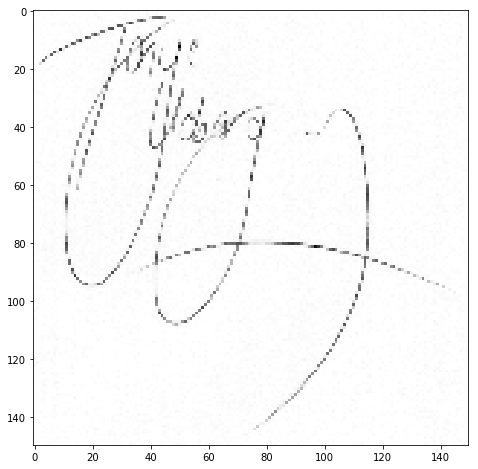

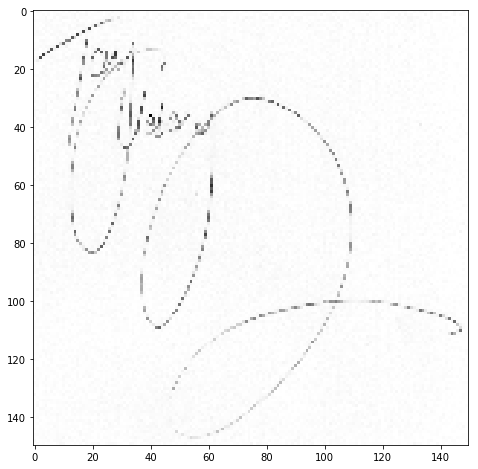

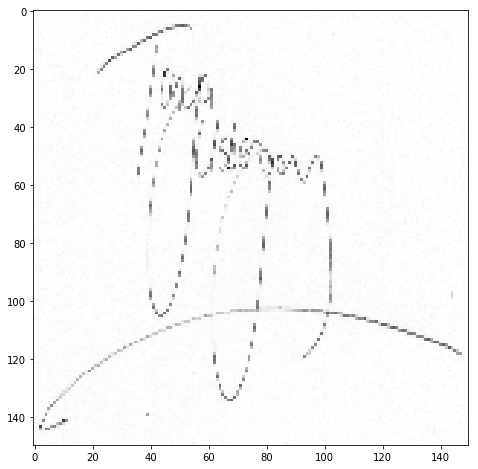

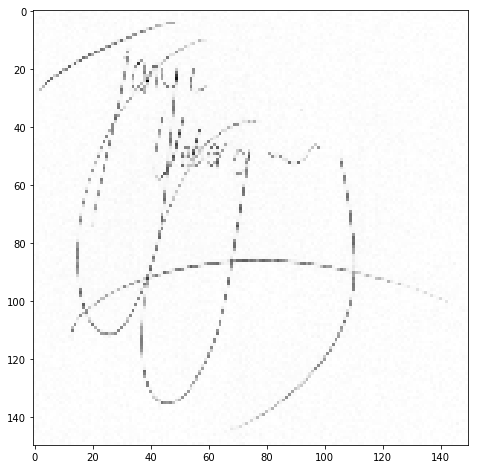

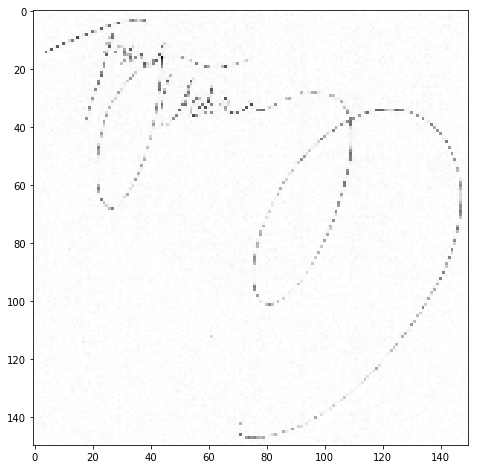

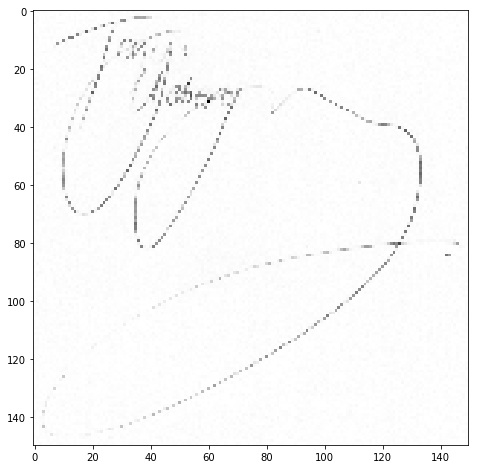

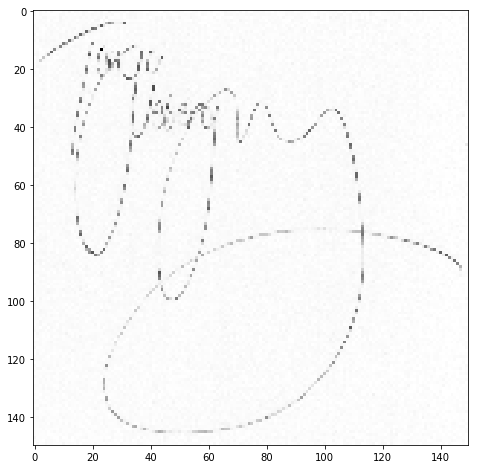

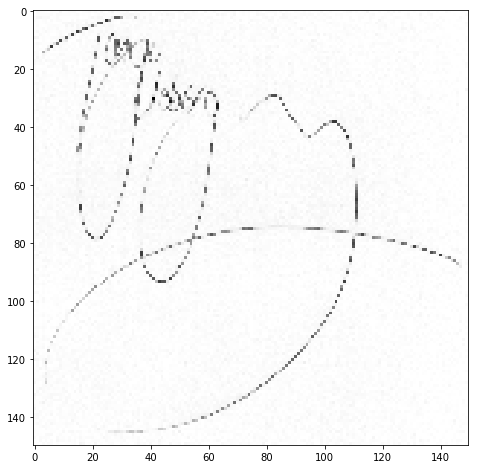

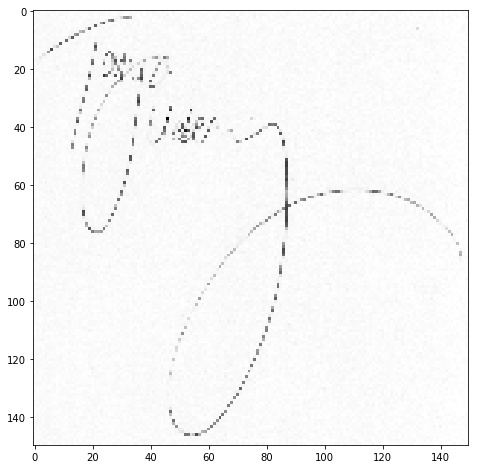

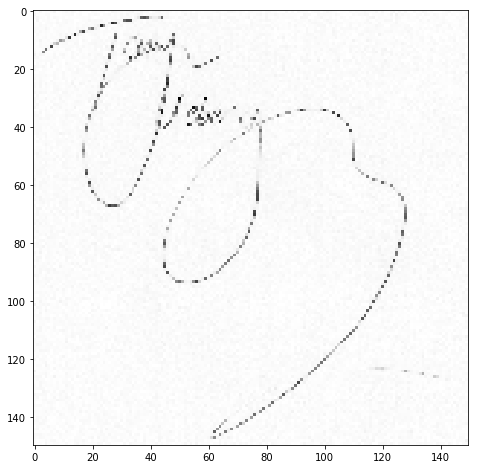

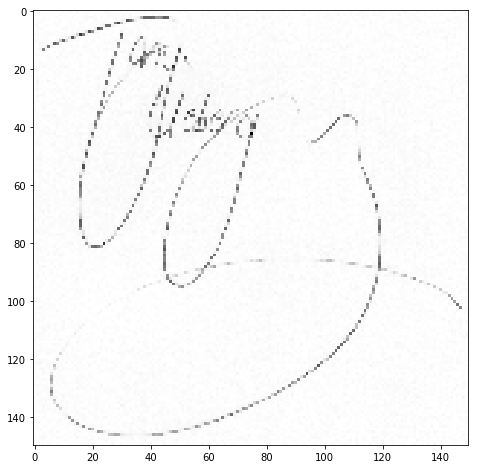

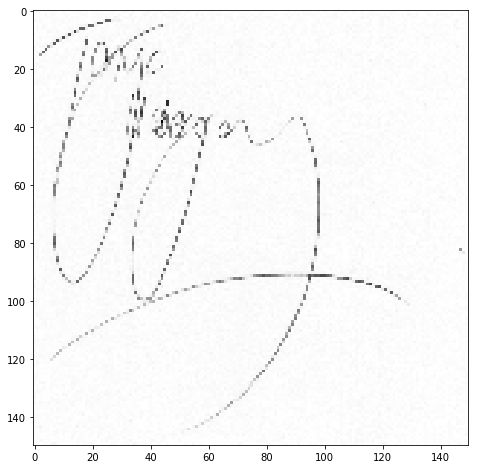

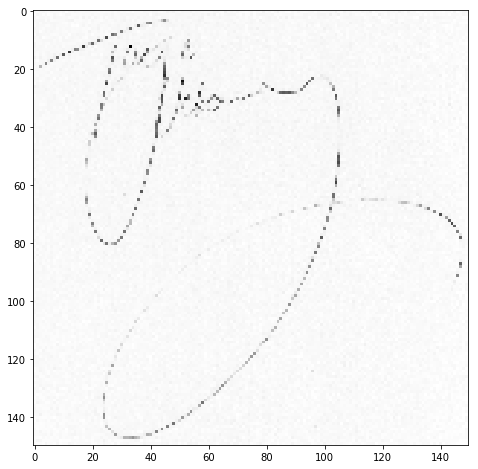

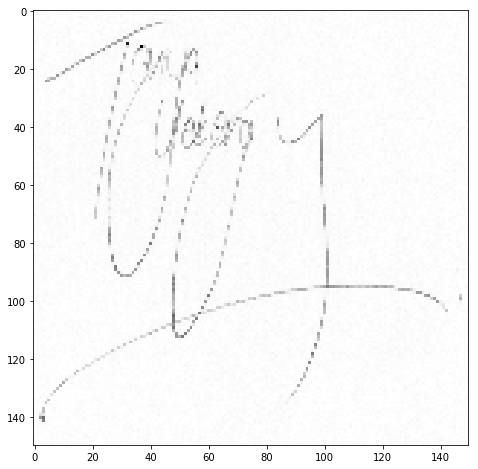

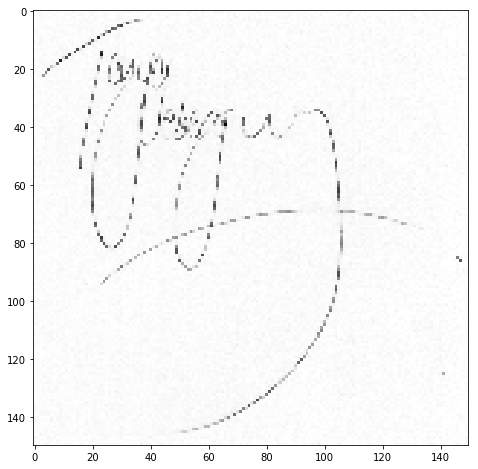

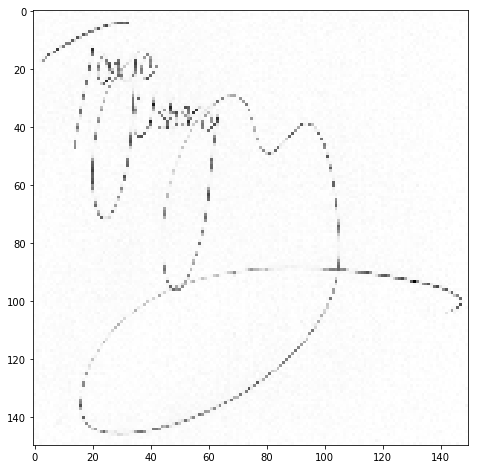

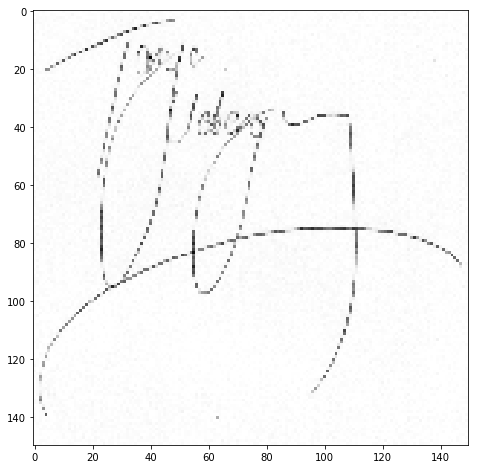

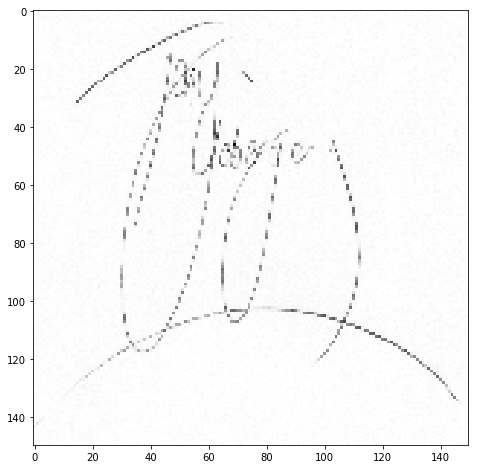

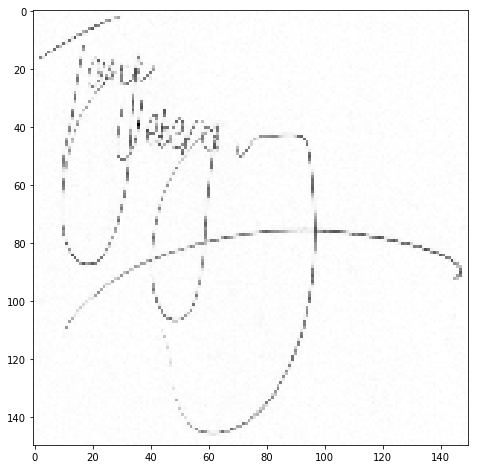

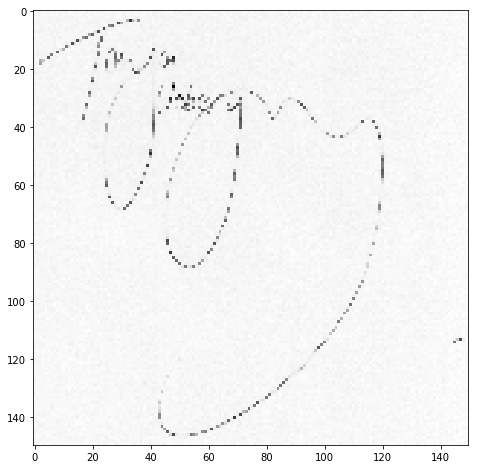

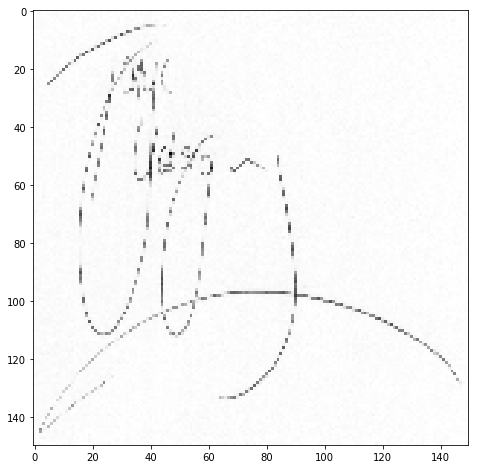

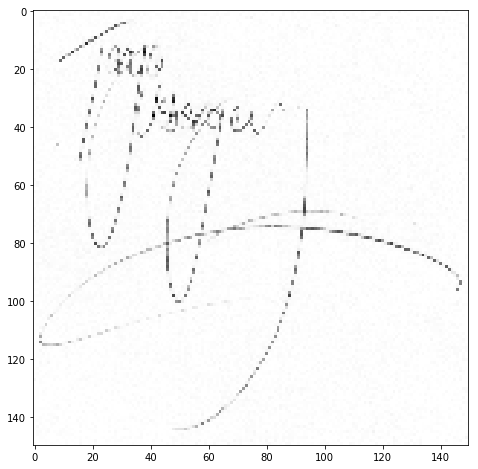

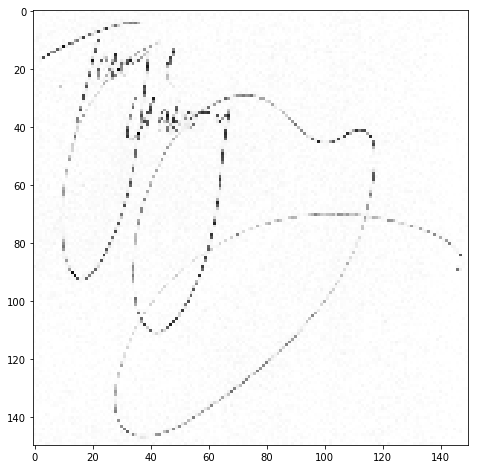

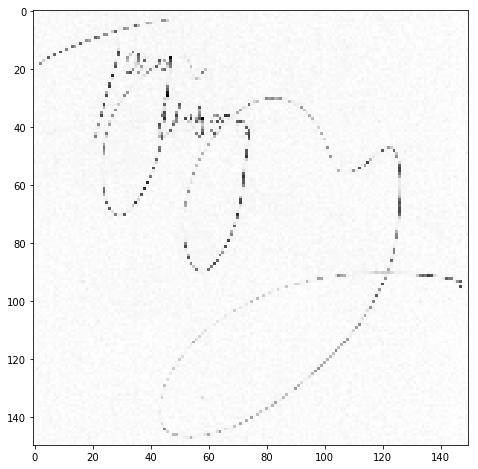

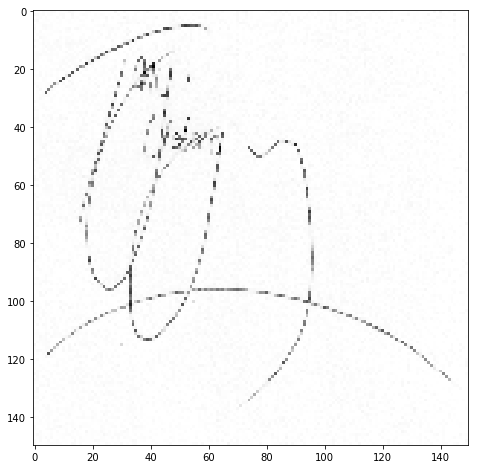

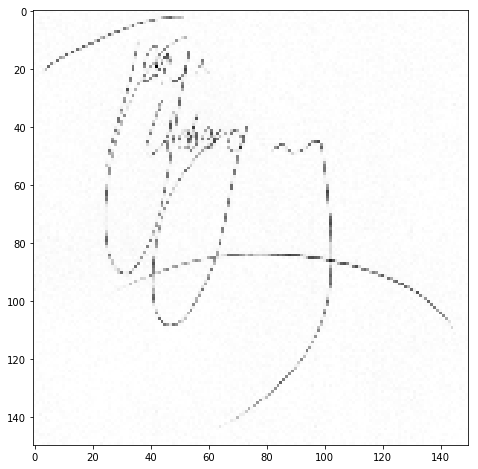

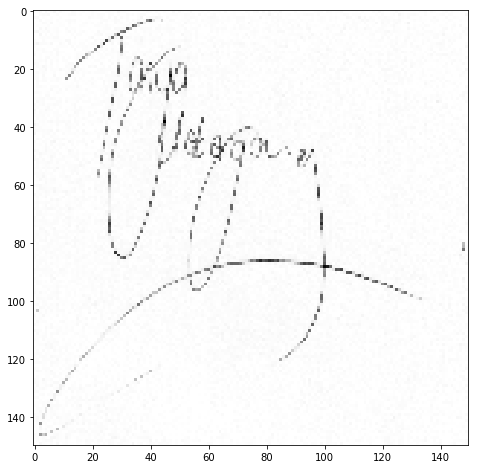

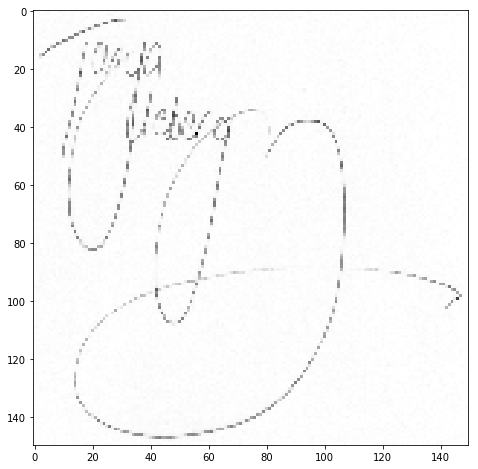

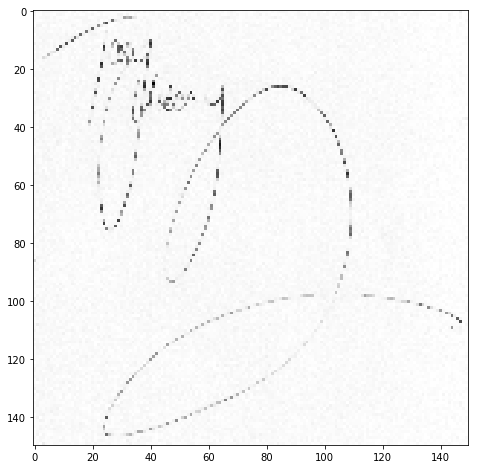

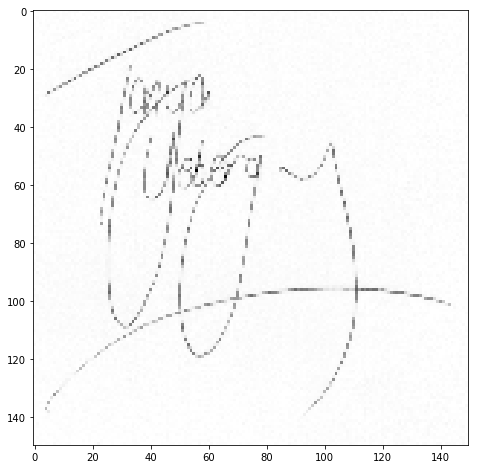

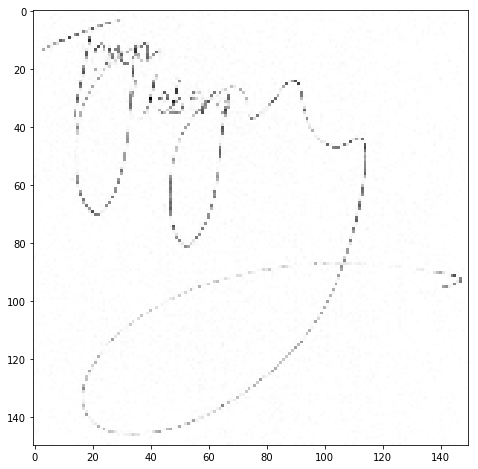

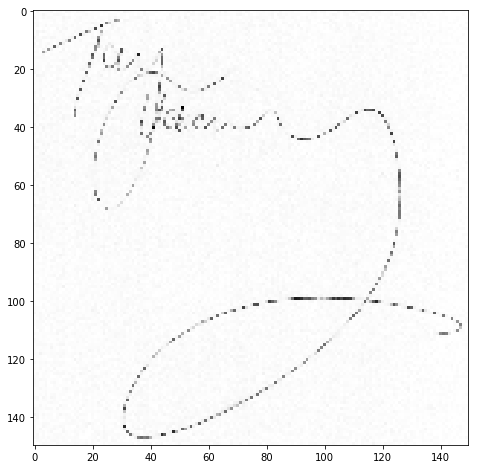

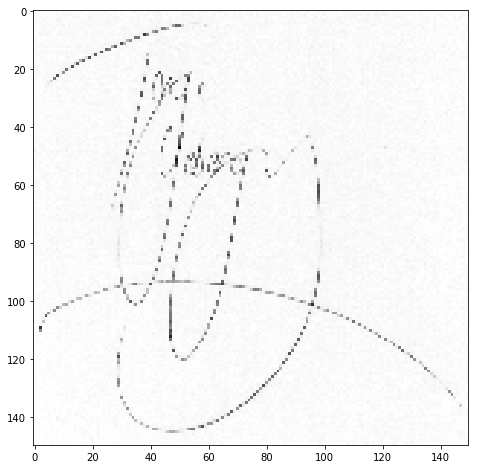

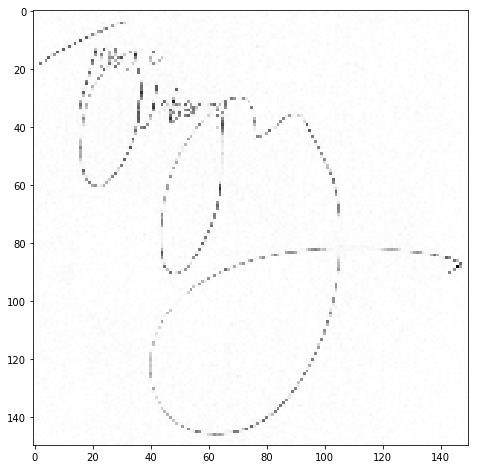

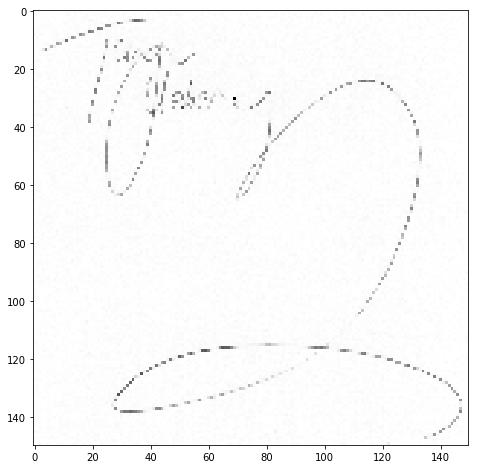

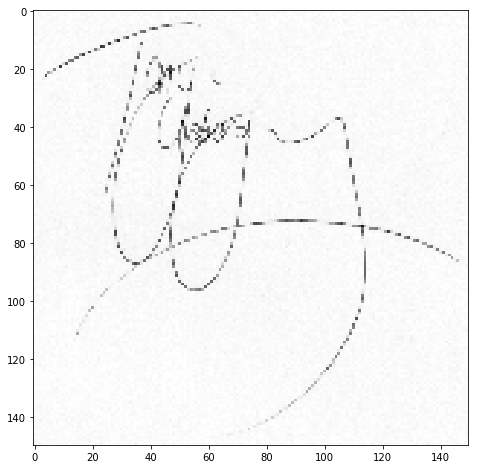

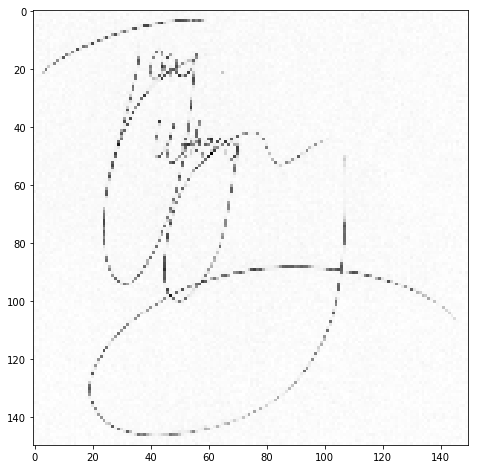

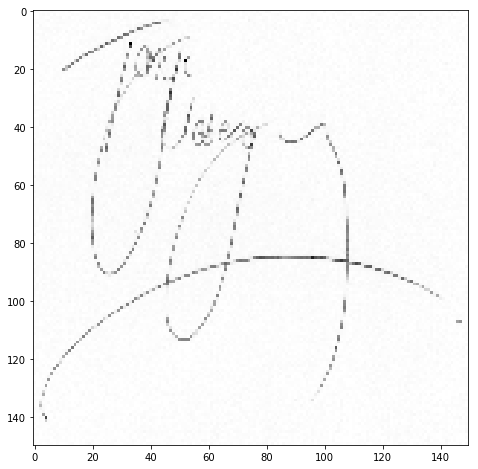

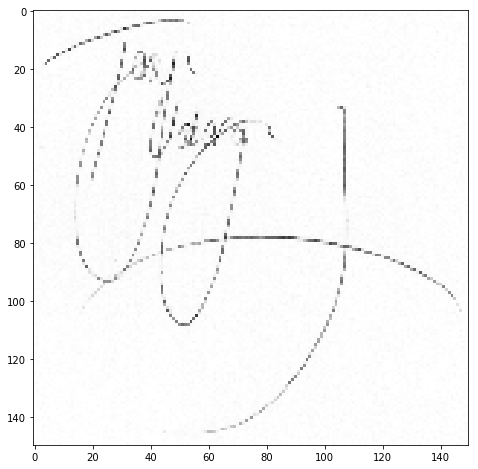

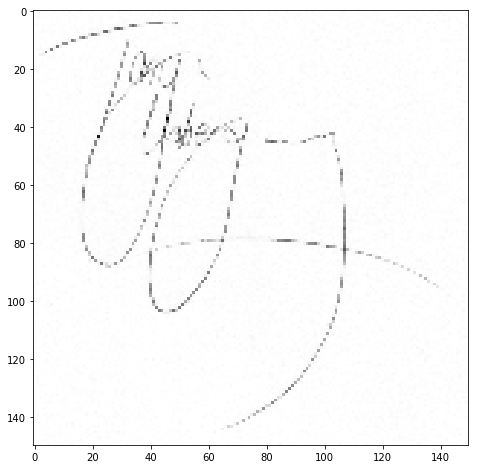

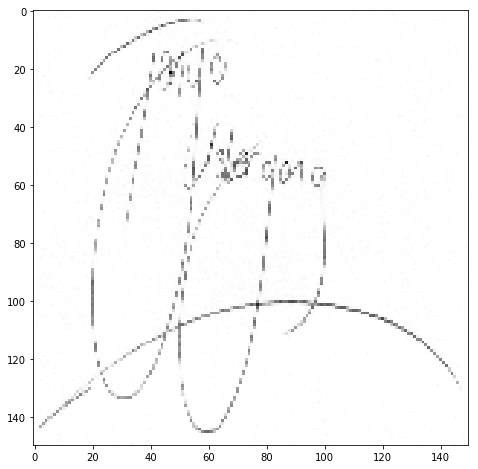

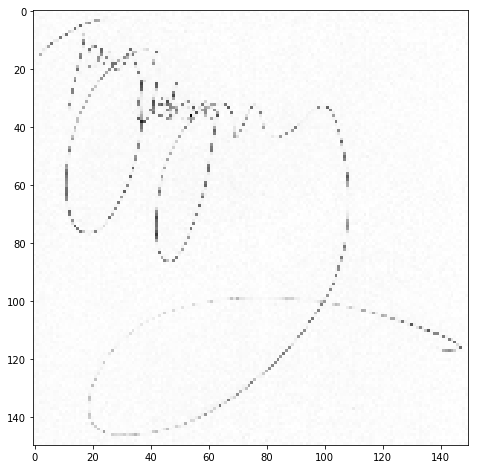

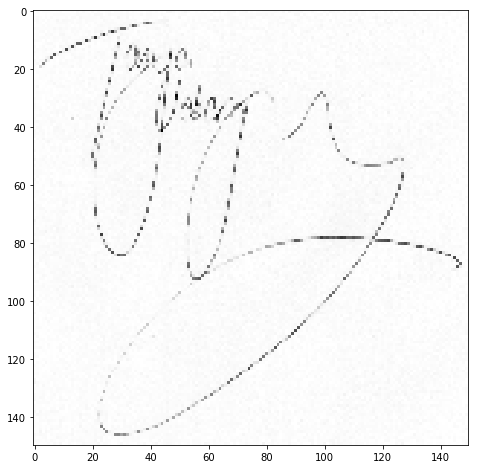

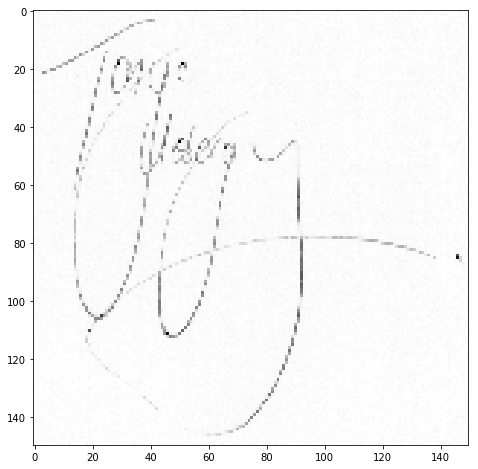

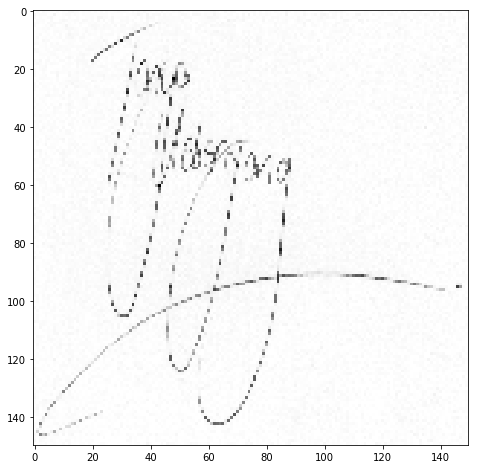

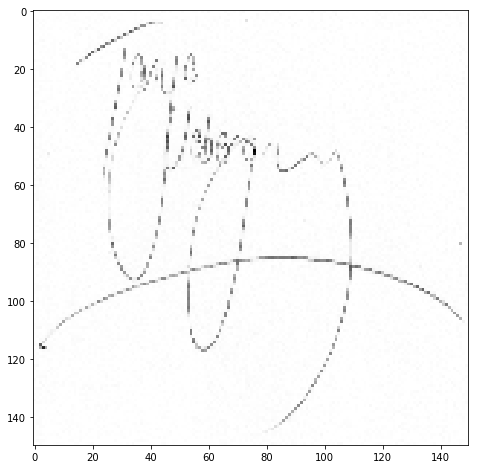

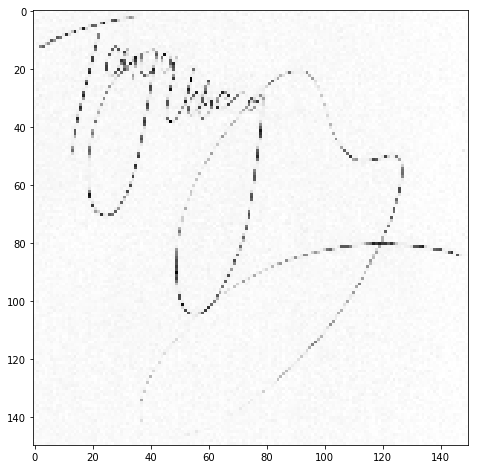

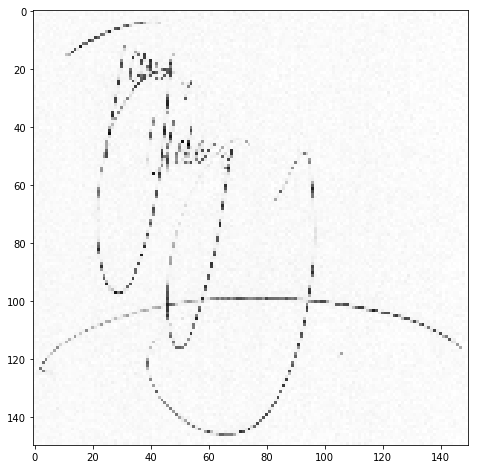

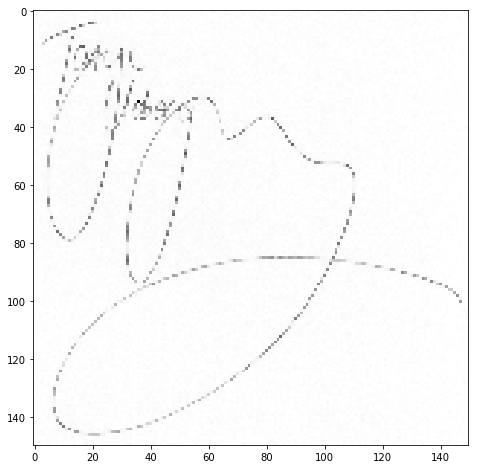

In [42]:
plt.close()
for ima in images28:
    plt.figure()
    plt.imshow(ima)

In [ ]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [ ]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        print('EPOCH', i)
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images28, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)
        print('DONE WITH EPOCH')